<a href="https://colab.research.google.com/github/couragedike1/linear_regression_model_/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression from Scratch

In this notebook, we'll build a simple linear regression model from scratch. The goal is to predict the height of a person given their age. We'll start by generating some sample data, and then we'll implement the linear regression algorithm step by step without using any machine learning libraries.


## Generating Sample Data

Let's create some sample data where we have ages and corresponding heights of people. We'll assume a simple linear relationship between age and height.


In [1]:
import random

# Generate some sample data
random.seed(42)  # For reproducibility

ages = list(range(1, 21))  # Ages from 1 to 20
heights = [50 + 2.5 * age + random.uniform(-5, 5) for age in ages]  # Height = 50 + 2.5 * age + some noise

# Print the sample data
for age, height in zip(ages, heights):
    print(f"Age: {age}, Height: {height:.2f}")


Age: 1, Height: 53.89
Age: 2, Height: 50.25
Age: 3, Height: 55.25
Age: 4, Height: 57.23
Age: 5, Height: 64.86
Age: 6, Height: 66.77
Age: 7, Height: 71.42
Age: 8, Height: 65.87
Age: 9, Height: 71.72
Age: 10, Height: 70.30
Age: 11, Height: 74.69
Age: 12, Height: 80.05
Age: 13, Height: 77.77
Age: 14, Height: 81.99
Age: 15, Height: 89.00
Age: 16, Height: 90.45
Age: 17, Height: 89.70
Age: 18, Height: 95.89
Age: 19, Height: 100.59
Age: 20, Height: 95.06


## Visualizing the Data

Before we start building the model, let's visualize the data to see if we can observe a linear relationship between age and height.


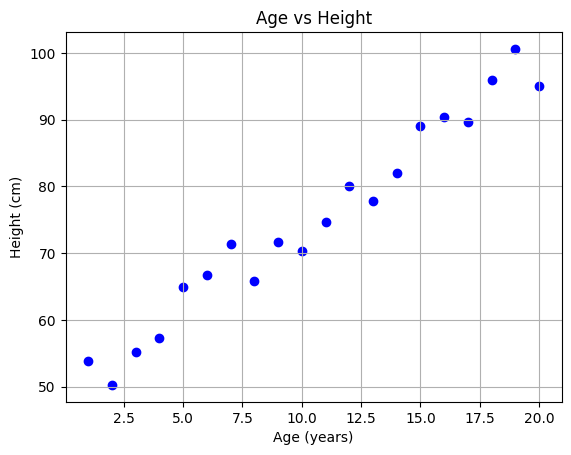

In [2]:
import matplotlib.pyplot as plt

plt.scatter(ages, heights, color='blue')
plt.title('Age vs Height')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()


## Linear Regression Basics

Linear regression tries to model the relationship between two variables by fitting a linear equation to observed data. The equation for a simple linear regression model is expressed as:

\
y = mx + c


Where:
- \( y \) represents the dependent variable (in our case, the **Height**).
- \( x \) represents the independent variable (in our case, the **Age**).
- \( m \) is the slope of the line, which represents the rate of change in height with respect to age.
- \( c \) is the intercept, which represents the height when the age is 0.

In this context:
- \( m \) tells us how much the height increases for each additional year of age.
- \( c \) gives us the estimated height of a person when they are newborn (age 0).


## Implementing Linear Regression: Step by Step

In this section, we'll implement the linear regression algorithm step by step. The goal is to find the best-fitting line for our data, which can be expressed in the form of:

y = mx + c


Where:
- \( y \) is the dependent variable (Height).
- \( x \) is the independent variable (Age).
- \( m \) is the slope of the line, indicating the rate of change in height with respect to age.
- \( c \) is the intercept, indicating the height when age is 0.

### Step 1: Calculate the Means of Age and Height

The first step in implementing linear regression is to calculate the mean (average) of both the independent variable (age) and the dependent variable (height). These means will be used later to calculate the slope and intercept.

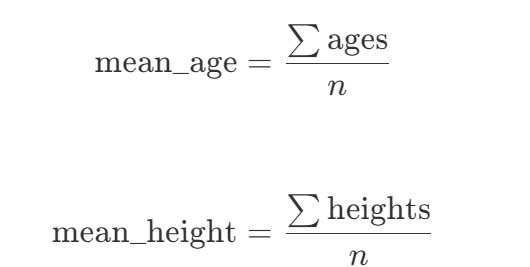

Where  n is the number of data points.

### Step 2: Calculate the Numerator and Denominator for the Slope (m)

The slope \( m \) of the line can be calculated using the formula:

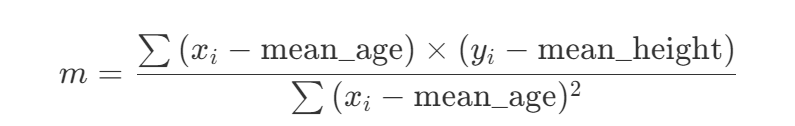

Here, x(i) and y(i) represent the individual data points for age and height, respectively. The numerator is the sum of the product of the differences between each age and the mean age, and each height and the mean height. The denominator is the sum of the squared differences between each age and the mean age.

### Step 3: Calculate the Intercept (c)

Once we have the slope \( m \), we can calculate the intercept \( c \) using the mean values calculated earlier:

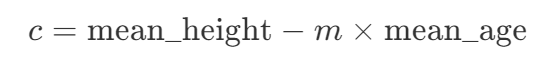

The intercept represents the height when the age is 0, which is where the line crosses the y-axis.

### Step 4: Output the Slope and Intercept

Finally, we'll output the slope \( m \) and intercept \( c \), which define our linear regression model.


In [3]:
# Step 1: Calculate the means of ages and heights
mean_age = sum(ages) / len(ages)
mean_height = sum(heights) / len(heights)

# Step 2: Calculate the numerator and denominator for the slope (m)
numerator = sum((age - mean_age) * (height - mean_height) for age, height in zip(ages, heights))
denominator = sum((age - mean_age) ** 2 for age in ages)

# Step 3: Calculate the slope (m) and intercept (c)
m = numerator / denominator
c = mean_height - m * mean_age

# Step 4: Output the slope and intercept
print(f"Slope (m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")


Slope (m): 2.49
Intercept (c): 48.97


## Visualizing the Regression Line

After calculating the slope \( m \) and intercept \( c \) of our linear regression model, we can visualize how well our model fits the data by plotting the regression line along with the original data points.

### Step 1: Generate the Predicted Heights

First, we'll use our linear regression model to predict the height for each age in our dataset. The prediction is made using the equation of the line we derived:

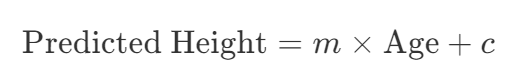

We'll calculate these predicted heights for each age in our data.

### Step 2: Plot the Original Data

Next, we'll plot the original data points (age vs. height) on a scatter plot. This will show us the actual relationship between age and height in our sample data.

### Step 3: Plot the Regression Line

Finally, we'll plot the regression line on the same graph. This line represents the relationship between age and height as predicted by our linear regression model. The closer this line is to the original data points, the better our model fits the data.

### Step 4: Interpret the Graph

By comparing the scatter plot of the original data points with the regression line, we can visually assess the performance of our model. If the points are closely aligned with the line, it indicates a good fit; if they are widely scattered, the model may not be as accurate.



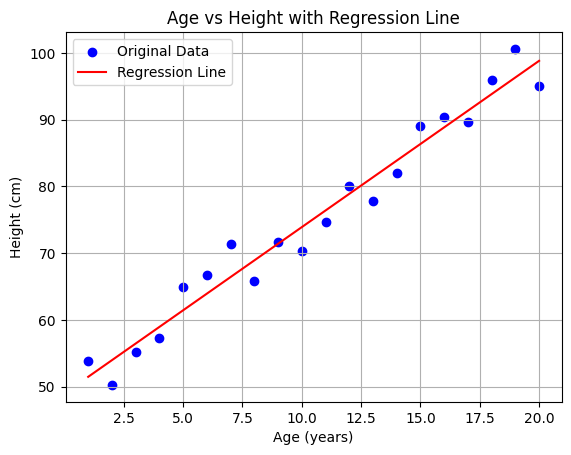

In [4]:
# Step 1: Generate the predicted heights using the regression line equation
predicted_heights = [m * age + c for age in ages]

# Step 2: Plot the original data points
plt.scatter(ages, heights, color='blue', label='Original Data')

# Step 3: Plot the regression line
plt.plot(ages, predicted_heights, color='red', label='Regression Line')

# Adding titles and labels
plt.title('Age vs Height with Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')

# Adding a legend to differentiate between the original data and the regression line
plt.legend()

# Display the grid for better readability
plt.grid(True)

# Step 4: Show the plot
plt.show()


## Evaluating the Model

After fitting the regression line to our data, it's essential to evaluate how well the model performs. One of the most common metrics for evaluating a linear regression model is the **Mean Squared Error (MSE)**.

### Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squared differences between the actual heights and the predicted heights. It gives us an idea of how far our predictions are from the actual data points.

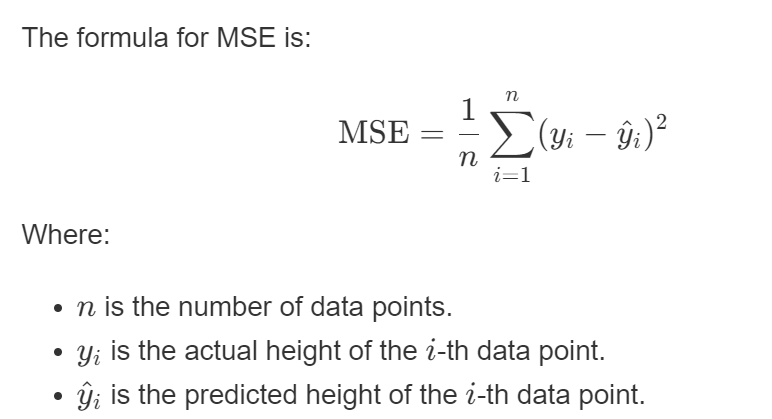

### Step 1: Calculate the Squared Errors

For each data point, subtract the predicted height from the actual height to get the error. Then, square this error to ensure that all differences are positive.

### Step 2: Compute the Mean of the Squared Errors

Sum all the squared errors and divide by the total number of data points to get the MSE.

### Step 3: Interpret the MSE

A lower MSE indicates that the model's predictions are closer to the actual values, meaning the model is a good fit. A higher MSE suggests that the model's predictions deviate significantly from the actual values, indicating a poor fit.


In [5]:
# Step 1: Calculate the squared errors
squared_errors = [(height - predicted) ** 2 for height, predicted in zip(heights, predicted_heights)]

# Step 2: Compute the Mean Squared Error (MSE)
mse = sum(squared_errors) / len(heights)

# Step 3: Output the MSE
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 8.04


The Mean Squared Error (MSE) is a measure of how well your linear regression model fits the data. Specifically, it quantifies the average squared difference between the actual heights and the predicted heights.

In this case, an MSE of 8.04 suggests that, on average, the squared difference between the actual height and the height predicted by your model is 8.04 units squared (in this context, squared centimeters since we’re working with height).